In [18]:
import pandas as pd
import my_funcs
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (16,6)

In [6]:
demo = pd.read_csv('data/hh_demographic.csv')

In [10]:
weekly_hh = pd.read_csv('data/outputs/hh_tensors.csv')
weekly_hh['household_key'] = weekly_hh['household_key'].astype(int)

In [12]:
weekly_hh.sort_values('household_key')

,household_key,weekly_sum_sales,weekly_retail_disc,weekly_num_baskets,weekly_item_quantity,weekly_unique_products,weekly_alcohol,weekly_beverages,weekly_concessions,weekly_dairy,...,weekly_garden,weekly_grain_goods,weekly_grocery,weekly_home_family,weekly_junk_food,weekly_kitchen,weekly_meat,weekly_misc,weekly_produce,weekly_seasonal
1894,1,47.357126,7.380920,0.931034,21.850575,18.747126,0.074483,3.618736,0.233678,4.169655,...,0.000000,7.682874,2.646437,6.175747,8.781839,0.018276,4.356782,3.492184,5.492184,0.000000
74,2,23.833415,4.067073,0.548780,10.158537,8.670732,0.581341,1.116951,0.511341,1.919024,...,0.000000,1.766951,0.575732,5.828293,3.117439,0.097317,3.387561,1.705854,2.590366,0.085244
902,3,30.978824,7.854000,0.541176,18.694118,10.705882,0.067294,1.122118,0.516235,1.492353,...,0.000000,3.211412,1.604941,1.904941,5.981059,0.000000,9.581765,2.334353,3.075765,0.023412
1905,4,15.790921,1.521711,0.394737,5.026316,3.921053,3.272632,0.039342,0.064342,1.741579,...,0.000000,1.233158,1.119342,1.956711,3.442632,0.000000,1.777500,0.791184,0.246184,0.000000
2230,5,8.085116,1.098605,0.418605,2.604651,2.337209,0.601744,0.665698,0.028953,0.618372,...,0.000000,0.202558,0.185581,1.891163,0.396744,0.046395,1.794070,0.952093,0.146977,0.015000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,2496,48.971341,13.453293,0.585366,23.085366,17.841463,2.024756,1.040122,0.271707,2.957927,...,0.000000,3.916585,1.259634,5.180732,4.395854,0.091220,19.363293,4.371951,4.053171,0.021829
1624,2497,78.075287,14.938736,2.321839,33.655172,21.551724,4.269195,1.414483,0.917356,5.379655,...,0.106667,6.551839,4.033448,9.978046,9.571839,0.045862,17.940575,6.089770,10.804598,0.269770
1184,2498,29.021264,3.167586,1.931034,10.965517,9.724138,1.578046,1.588966,0.622184,4.500805,...,0.059425,3.671034,1.673218,3.020345,2.904483,0.000000,3.509425,1.471264,2.624828,0.000000
671,2499,32.505412,4.996118,0.858824,16.164706,12.164706,0.094000,1.785294,1.428353,2.632353,...,0.000000,4.834471,2.369059,3.546118,4.932353,0.140706,4.872824,2.728000,2.167882,0.000000


In [14]:
# Examining 

merged_demo = pd.read_csv('data/outputs/merged_demo.csv') # merged, but for households in demo

# getting section sales for the data; merging with demo
demo_ss = weekly_hh.merge(demo, on='household_key')

demo_ss

,household_key,weekly_sum_sales,weekly_retail_disc,weekly_num_baskets,weekly_item_quantity,weekly_unique_products,weekly_alcohol,weekly_beverages,weekly_concessions,weekly_dairy,...,weekly_misc,weekly_produce,weekly_seasonal,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC
0,243,71.111264,8.389885,2.034483,30.195402,22.931034,0.165287,4.110690,3.976552,6.698621,...,5.392644,18.002299,0.000000,65+,U,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown
1,707,173.589659,22.359318,4.409091,58.568182,44.840909,14.664318,12.311932,1.994091,18.814659,...,10.660000,18.619659,0.316818,25-34,A,100-124K,Homeowner,2 Adults Kids,5+,3+
2,329,34.054023,2.869425,1.655172,17.643678,15.494253,0.057356,0.686552,2.663103,3.589310,...,2.496322,6.856897,0.000000,25-34,U,75-99K,Unknown,Single Female,1,None/Unknown
3,1975,173.590227,17.069773,3.386364,55.204545,41.000000,20.819545,8.002614,10.031364,12.927614,...,10.497273,12.692727,1.557727,35-44,B,75-99K,Renter,Single Male,1,None/Unknown
4,1797,58.418046,12.481494,1.160920,22.275862,18.862069,1.643563,0.839770,1.245057,2.572989,...,8.197356,7.255287,0.017126,65+,U,Under 15K,Homeowner,Single Female,1,None/Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,1443,23.532841,1.652045,1.920455,8.340909,5.613636,8.345114,0.223295,0.067955,1.029659,...,0.386705,1.930114,0.000000,35-44,U,150-174K,Unknown,2 Adults No Kids,2,None/Unknown
797,2279,10.641047,2.403837,0.662791,4.837209,4.383721,0.646047,0.794186,0.109535,1.055465,...,0.469302,0.654070,0.000000,25-34,U,50-74K,Unknown,2 Adults No Kids,2,None/Unknown
798,48,12.162048,2.306867,0.542169,4.783133,3.939759,0.000000,0.075663,0.767349,0.884578,...,0.730602,0.583614,0.023855,19-24,U,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown
799,16,14.408235,1.848706,1.011765,6.247059,5.352941,0.140941,0.352235,0.000000,1.877882,...,1.616000,1.061412,0.000000,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown


### `HOUSEHOLD_SIZE_DESC`

Each household has a varying number of members, as given in `HOUSEHOLD_SIZE_DESC`; be them children or adults. This will almost certainly impact the sales total for each household, as well as the products they might want to receive advertisements for.

We might imagine that **households with more members will require more food and other goods**; that families (or larger households) have the potential to be our best customers. For example, individuals or couples might be at an inherent 'disadvantage' in terms of aggregate sales comparisons with households of 5+; in terms of monetary value or even frequency of purchases, **larger households might spend more, more often**. 

## plot_categorical_column

In [19]:
def plot_categorical_column(demo, 
                            merged,
                            mean=True,
                            resample_rule='BM',
                            sales_col='SALES_VALUE',
                            label_col='HOUSEHOLD_SIZE_DESC'):
    
    if mean==True:
        plt.title(f'Mean Sum of {sales_col} by {label_col}; over {resample_rule}')
    elif mean==False:
        plt.title(f'Sum of {sales_col} by {label_col}; over {resample_rule}')

    for size in demo[label_col].unique():
        hh_ids = list(demo[demo[label_col]==size]['household_key'])
        
        if mean==True: # divide by len(hh_ids)
            plt.plot((merged[merged['household_key'].isin(hh_ids)].resample(resample_rule,convention='end', on='datetime')['SALES_VALUE'].sum()/len(hh_ids)), label=f'{size}')
        else:
            plt.plot(merged[merged['household_key'].isin(hh_ids)].resample(resample_rule,convention='end', on='datetime')['SALES_VALUE'].sum(), label=f'{size}')

    
    plt.legend()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

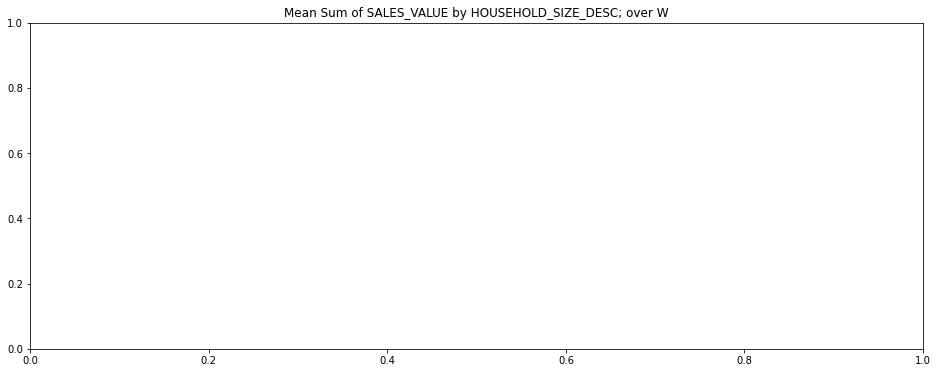

In [21]:
plt.figure(figsize=(16,6))
plot_categorical_column(demo, merged_demo, resample_rule='W')

In [ ]:
Interesting that single and couple households tend to have more stable sales numbers, by the look of this weekly chart. If we pull it up again as a monthly;

In [ ]:
plt.figure(figsize=(16,6))
plot_categorical_column(demo, merged, resample_rule='BM')

In [ ]:
- We can see that households with more members definitely seem to be purchasing more than our 2-member households, and they themselves more than our 1 member households.

- There is a seemingly significant downtick in revenue across all household size categories in March and again in July 2005. Households of size 3 and 5+ appear to be least affected.

- We have a seemingly significant increase in the spending by households of size 5+ from that point on. However, if we look at the total sum of sales:

In [ ]:
plt.figure(figsize=(16,6))
plot_categorical_column(demo, merged, mean=False)

In [ ]:
We see that since the households with children are broken into three groups, the uptick isn't quite as noticeable. We'll examine the trend of the data in subsequent notebooks.

# Going back to that downtick, let's briefly glance at our advertising campaigns to see if we can identify a correlation; a #campaign ending perhaps. Another theory could be that the price of a key item or series of items was increased at this time.

# my_funcs.make_date_map(merged, 'DAY')

# my_funcs.load_campaign_summary(merged) ## TODO: this should load datetime values!!!

# Campaigns 8 and 9 ended on or near day 460; the 25th of June, 2005.

In [ ]:
hue='INCOME_DESC'
data = merged[merged['household_key'].isin(demo)]

In [ ]:
### `AGE_DESC & INCOME_DESC`

In [ ]:
Despite potentially having multiple members in a household, we have only a single value for `AGE_DESC` and `INCOME_DESC`; we can't be sure whether the respondent of the survey has entered their own income, or the total income of their household.

I would argue that the age description column gives us information about the breadwinners of the household (if they are similar in age) more so than it deceives us, and is therefore still a viable column for examining patterns, for example among individuals; couples; or families.

The information contained in the columns `HH_COMP_DESC`, `MARITAL_STATUS_CODE`, and `KID_CATEGORY_DESC` have inter-correlated or multi-collinear data, and might confuse any sales regression models about the feature importance of each. 

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,6))
plt.subplot(2,1,1)
plot_categorical_column(demo, merged, label_col='AGE_DESC',)
plt.subplot(2,1,2)
plot_categorical_column(demo, merged, mean=False, label_col='AGE_DESC',)
plt.tight_layout()
plt.show()

In [ ]:
Going from 5 to 6 labels makes the plots more difficult to interpret. In the second plot we can see that households in the 34-44, as well as the 45-54 age ranges are our biggest nominal spenders. Per capita, it is the 35-44 age range that has the highest mean sum of sales. 

Slump from January through march 2005 except for youngest group; uptick across non-middle aged categories in April 2005, across all categories June 2005; and again for most categories in September 2005. We'll have to take a look again after we remove seasonality and trend from the data. 

In [ ]:
# Sales Plots by Income Group

In [ ]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,6))
plt.subplot(2,1,1)
plot_categorical_column(demo, merged, label_col='INCOME_DESC',)
plt.subplot(2,1,2)
plot_categorical_column(demo, merged, mean=False, label_col='INCOME_DESC',)
plt.tight_layout()
plt.show()

In [ ]:
This column is going to need some cleaning before we can effectively visualize the groups.

In [15]:
demo['INCOME_DESC'] = demo['INCOME_DESC'].map({'Under 15K': '0-49K',
 '175-199K': '100K+',
 '35-49K': '0-49K',
 '125-149K': '100K+',
 '150-174K': '100K+',
 '15-24K': '0-49K',
 '50-74K': '50-99K',
 '250K+': '100K+',
 '200-249K': '100K+',
 '100-124K': '100K+',
 '75-99K': '50-99K',
 '25-34K': '0-49K'})

fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,6))
plt.subplot(2,1,1)
plot_categorical_column(demo, merged, label_col='INCOME_DESC',)
plt.subplot(2,1,2)
plot_categorical_column(demo, merged, mean=False, label_col='INCOME_DESC',)
plt.tight_layout()
plt.show()

We see that while customers from our highest income bracket have the highest mean sum of sales; this group is actually the smallest contributor to total revenue when compared with middle and low income brackets. The lowest income bracket takes the top spot in terms of total revenue (over time).

demo.columns

hh_agg = pd.read_csv('data/outputs/hh_agg.csv', index_col=0)



sns.pairplot(data=hh_agg[['avg_basket_spend', 'total_spend']],hue=demo_ss['INCOME_DESC'])

SyntaxError: invalid syntax (Temp/ipykernel_16804/3497296760.py, line 28)